In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from typing import cast, Any
from matplotlib.cm import tab10  # type: ignore
from cobaya import get_model
from eftpipe.model import EFTModel
from eftpipe.reader import read_pkl

In [2]:
os.chdir("../")

In [12]:
plt.rcParams["text.usetex"] = True
GRAY = GREY = tab10.colors[-3]
BLUE = tab10.colors[0]
ORANGE = tab10.colors[1]
GREEN = tab10.colors[2]
RED = tab10.colors[3]

In [4]:
from script.mkbestfit import main as mkbestfit

bestfit:
{'ELG_NGC_b1': 1.197322999,
 'ELG_NGC_b3': 0.42341730741728156,
 'ELG_NGC_c2': -0.05078329873,
 'ELG_NGC_cct': 0.5149330900557345,
 'ELG_NGC_ce0': 0.395138540857938,
 'ELG_NGC_cequad': -0.09133163193551752,
 'ELG_NGC_cr1': -1.4543772918486013,
 'H0': 67.20147748,
 'LRG_NGC_b1': 2.017188586,
 'LRG_NGC_b3': 0.49805931963771854,
 'LRG_NGC_c2': 0.1161464451,
 'LRG_NGC_cct': -0.15879500090784404,
 'LRG_NGC_ce0': 0.464679446801485,
 'LRG_NGC_cequad': -0.5777654884400079,
 'LRG_NGC_cr1': -0.9706054426479795,
 'logA': 3.173854217,
 'omegach2': 0.1030561938,
 'x_NGC_ce0': 0.2940866980385457,
 'x_NGC_cequad': -0.46089889501376535}


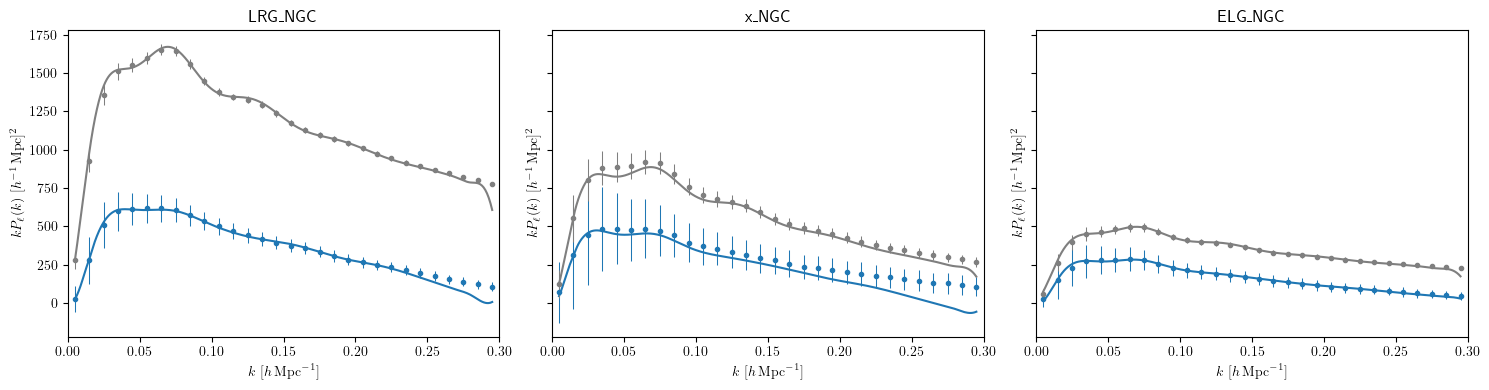

In [5]:
cmd = (
    "--likelihoods LRGxELG_NGC "
    "--tracers LRG_NGC x_NGC ELG_NGC --base "
    "cobaya cobaya/chains/new_mock_noric_eBOSS_LRGxELG_NGC.input.yaml "
    "--sharey"
)
mkbestfit(cmd.split())
plt.show()

bestfit:
{'LRG_NGC_b1': 2.15761714,
 'LRG_NGC_b3': 0.77438152685487,
 'LRG_NGC_c2': 0.9561280019,
 'LRG_NGC_cct': -0.2594317476571355,
 'LRG_NGC_ce0': 0.09632233645988182,
 'LRG_NGC_cequad': -0.4560962347637009,
 'LRG_NGC_cr1': -6.888202594807584}


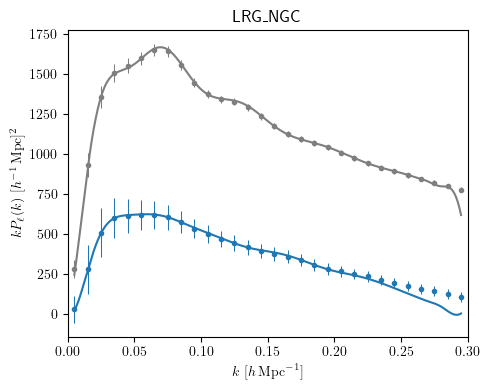

bestfit:
{'ELG_NGC_b1': 1.297016605,
 'ELG_NGC_b3': 1.2115254911654454,
 'ELG_NGC_c2': 0.7688563221,
 'ELG_NGC_cct': -0.32977960826584674,
 'ELG_NGC_ce0': 0.09169133357851973,
 'ELG_NGC_cequad': 0.07540107335814031,
 'ELG_NGC_cr1': -3.33536106747792}


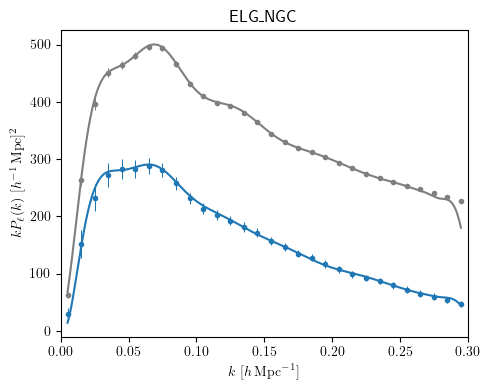

In [6]:
cmd = (
    "--likelihoods LRG_NGC "
    "--tracers LRG_NGC --base "
    "cobaya cobaya/chains/new_mock_noric_eBOSS_LRG_NGC_fixcosmo.input.yaml "
)
mkbestfit(cmd.split())
plt.show()

cmd = (
    "--likelihoods ELG_NGC "
    "--tracers ELG_NGC --base "
    "cobaya cobaya/chains/new_mock_noric_eBOSS_ELG_NGC_Vx27_fixcosmo.input.yaml "
)
mkbestfit(cmd.split())
plt.show()

In [7]:
df = read_pkl("cobaya/data/mock/noric_x_NGC.txt")

In [8]:
model = EFTModel(
    0.77, 7.65e-05, 0.00018518518518518518,
    kmA=0.7, krA=0.7,
    kmB=0.45, krB=0.45
)
model.set_cosmology(
    logA=3.0512226704330776,
    ns=0.9611,
    H0=67.77,
    omegach2=0.11891102387661001,
    omegabh2=0.02214,
    mnu=0,
    neutrino_hierarchy="degenerate",
)
model.set_IRresum().set_window(
    "cobaya/cache/x_NGC_interp.npy"
).set_APeffect(Om_AP=0.307, rdrag_AP=147.74, h_AP=0.6777).done()

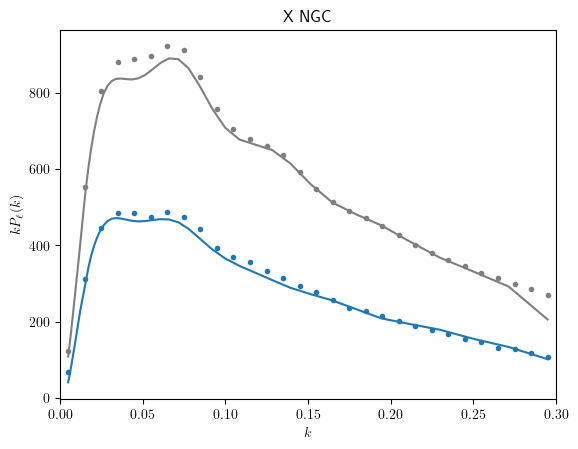

In [27]:
fn = model(
    b1A=2.15761714, c2A=0.9561280019, b3A=0.77438152685487, c4A=0,
    cctA=-0.2594317476571355, cr1A=-6.888202594807584, cr2A=0.0,
    ce0=-0.01, cemono=0, cequad=0.03,
    b1B=1.297016605, b3B=1.2115254911654454, c2B=0.7688563221, c4B=0,
    cctB=-0.32977960826584674, cr1B=-3.33536106747792, cr2B=0.0,
)
kd = df.index.to_numpy()
k = np.geomspace(df.index.min(), df.index.max())
plt.plot(k, k * fn(0, k), color=GRAY)
plt.plot(k, k * fn(2, k), color=BLUE)
plt.plot(kd, kd * df.P0, ".", color=GRAY)
plt.plot(kd, kd * df.P2, ".", color=BLUE)

plt.title("X NGC")
plt.xlim(0, 0.3)
plt.xlabel("$k$")
plt.ylabel(R"$kP_\ell(k)$")
plt.show()

### cross power spectrum can go back to auto

In [43]:
_model = EFTModel(
    0.77, 7.65e-05, 0.00018518518518518518,
    kmA=0.7, krA=0.7,
    kmB=0.7, krB=0.7,
)
_model.set_cosmology(
    logA=3.0512226704330776,
    ns=0.9611,
    H0=67.77,
    omegach2=0.11891102387661001,
    omegabh2=0.02214,
    mnu=0,
    neutrino_hierarchy="degenerate",
)
_model.set_IRresum().set_window(
    "cobaya/cache/x_NGC_interp.npy"
).set_APeffect(Om_AP=0.307, rdrag_AP=147.74, h_AP=0.6777).done()
_fn = _model(
    b1A=2.15761714, c2A=0.9561280019, b3A=0.77438152685487, c4A=0,
    cctA=-0.2594317476571355, cr1A=-6.888202594807584, cr2A=0.0,
    ce0=0, cemono=0, cequad=0,
    b1B=2.15761714, c2B=0.9561280019, b3B=0.77438152685487, c4B=0,
    cctB=-0.2594317476571355, cr1B=-6.888202594807584, cr2B=0.0,
)
_k = np.geomspace(df.index.min(), df.index.max())
result_x = fn([0, 2], _k)

_model = EFTModel(
    0.77, 7.65e-05,
    kmA=0.7, krA=0.7,
)
_model.set_cosmology(
    logA=3.0512226704330776,
    ns=0.9611,
    H0=67.77,
    omegach2=0.11891102387661001,
    omegabh2=0.02214,
    mnu=0,
    neutrino_hierarchy="degenerate",
)
_model.set_IRresum().set_window(
    "cobaya/cache/x_NGC_interp.npy"
).set_APeffect(Om_AP=0.307, rdrag_AP=147.74, h_AP=0.6777).done()
_fn = _model(
    b1A=2.15761714, c2A=0.9561280019, b3A=0.77438152685487, c4A=0,
    cctA=-0.2594317476571355, cr1A=-6.888202594807584, cr2A=0.0,
    ce0=0, cemono=0, cequad=0,
)
_k = np.geomspace(df.index.min(), df.index.max())
result_s = fn([0, 2], _k)

In [44]:
result_x - result_s

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

### compare (ric-corrected)standard to norci

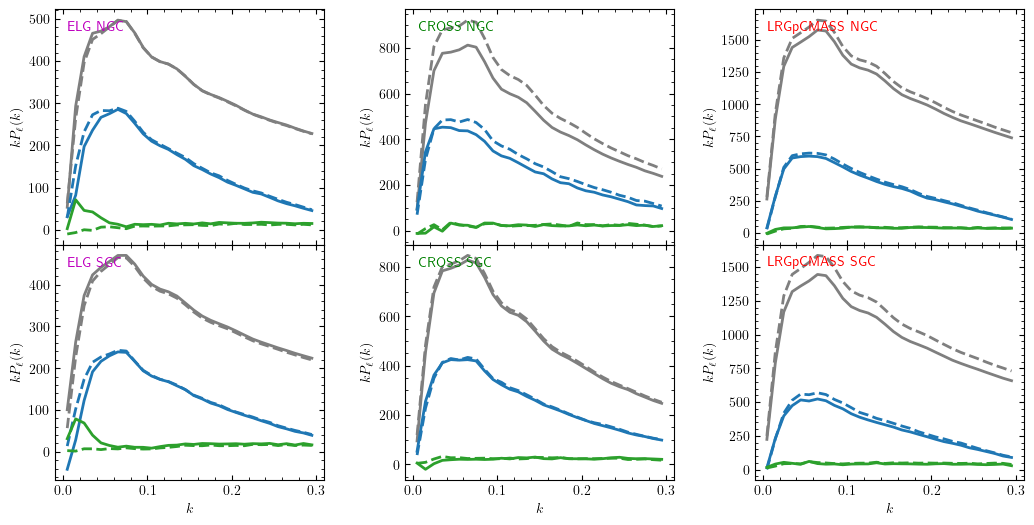

In [121]:
fig, axes = plt.subplots(
    2, 3, sharex=True, figsize=(15/1.2, 11/1.2/3*2),
    gridspec_kw={"hspace": 0, "wspace": 0.3},
)
axes = cast(Any, axes)
for i in range(2):
    for j in range(3):
        axes[i, j].tick_params(which="both", direction="in")
        axes[i, j].yaxis.set_ticks_position("both")
        axes[i, j].xaxis.set_ticks_position("both")
        axes[i, j].minorticks_on()
        # axes[i, j].set_ylim(-500, 1749)
for j in range(3):
    axes[-1, j].set_xlabel("$k$")
for i, cap in enumerate(["NGC", "SGC"]):
    for j, (tracer, c) in enumerate(zip(["ELG", "CROSS", "LRGpCMASS"], ["m", "g", "r"])):
        axes[i, j].text(
            0.05, 0.95, f"{tracer} {cap}", c=c,
            transform=axes[i, j].transAxes, va="top", ha="left",
        )
translator = {"ELG": "ELG", "CROSS": "x", "LRGpCMASS": "LRG"}
use_Q = False
do_rescaling = False
for i, cap in enumerate(["NGC", "SGC"]):
    for j, tracer in enumerate(["ELG", "CROSS", "LRGpCMASS"]):
        suf = ""
        s = "P"
        if use_Q:
            if tracer in ["ELG", "LRGpCMASS"]:
                suf = "_Q"
                s = "Q"
        std = read_pkl(f"cobaya/data/mock/{translator[tracer]}_{cap}{suf}.txt")
        noric = read_pkl(f"cobaya/data/mock/noric_{translator[tracer]}_{cap}{suf}.txt")
        kk = std["k"].to_numpy()
        for k, (ell, c) in enumerate(zip([0, 2, 4], [GREY, BLUE, GREEN])):
            rescale = 1
            if do_rescaling:
                if cap == "NGC" and tracer == "CROSS":
                    rescale = 1.13
                if cap == "SGC" and tracer == "CROSS":
                    rescale = 1.02
                if cap == "NGC" and tracer == "LRGpCMASS":
                    rescale = 1.05
                if cap == "SGC" and tracer == "LRGpCMASS":
                    rescale = 1.1
            axes[i, j].plot(kk, kk * std[f"{s}{ell}"] * rescale, color=c, lw=2)
            axes[i, j].plot(kk, kk * noric[f"{s}{ell}"], color=c, ls="--", lw=2)
            axes[i, j].set_ylabel(Rf"$k{s}_\ell(k)$")
plt.show()

In [67]:
def extract_err(path):
    cov = np.loadtxt(path)
    return np.sqrt(cov.diagonal())

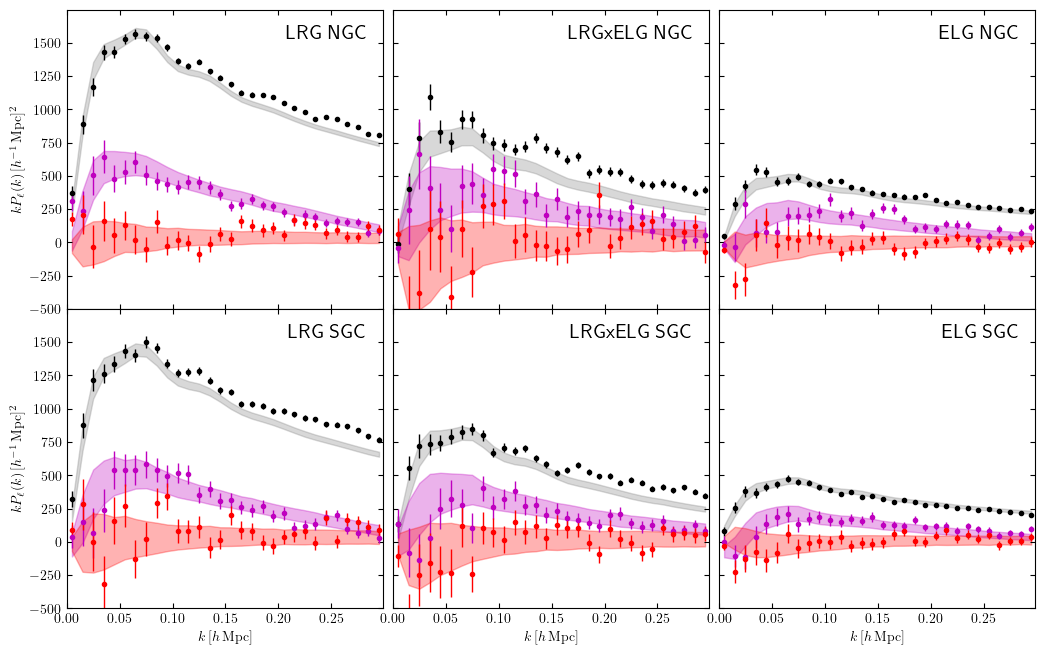

In [120]:
cap = "NGC"
lrg = read_pkl(f"cobaya/data/DR16/ric_LRG_{cap}.txt")
elg = read_pkl(f"cobaya/data/DR16/ric_ELG_{cap}.txt")
x = read_pkl(f"cobaya/data/DR16/ric_x_{cap}.txt")
lrg_mock = read_pkl(f"cobaya/data/mock/standard_LRG_{cap}.txt")
elg_mock = read_pkl(f"cobaya/data/mock/standard_ELG_{cap}.txt")
x_mock = read_pkl(f"cobaya/data/mock/standard_x_{cap}.txt")
lrg_err = extract_err(f"cobaya/data/cov/cov_{cap}_L024.txt").reshape(3, -1)
elg_err = extract_err(f"cobaya/data/cov/cov_{cap}_E024.txt").reshape(3, -1)
x_err = extract_err(f"cobaya/data/cov/cov_{cap}_X024.txt").reshape(3, -1)

fig, axes = plt.subplots(
    2, 3, sharex=True, sharey=True, figsize=(15/1.2, 14/1.2/3*2),
    gridspec_kw={"hspace": 0, "wspace": 0.03},
)
axes = cast(Any, axes)
for i in range(2):
    for j in range(3):
        axes[i, j].tick_params(which="both", direction="in")
        axes[i, j].yaxis.set_ticks_position("both")
        axes[i, j].xaxis.set_ticks_position("both")
        axes[i, j].set_ylim(-500, 1749)
        axes[i, j].set_xlim(0, 0.299)
for j in range(3):
    axes[-1, j].set_xlabel(R"$k\,[h\,\mathrm{Mpc}]$")
for i in range(2):
    axes[i, 0].set_ylabel(R"$kP_\ell(k)\,[h^{-1}\,\mathrm{Mpc}]^2$")
kk = lrg["k"].to_numpy()
for j, data, mock, err in zip([0, 1, 2], [lrg, x, elg], [lrg_mock, x_mock, elg_mock], [lrg_err, x_err, elg_err]):
    for k, (ell, c) in enumerate(zip([0, 2, 4], ["grey", "m", "r"])):
        yerr = kk * err[k]
        axes[0, j].errorbar(
            kk, kk * data[f"P{ell}"], yerr=yerr,
            fmt=".", color="k" if ell == 0 else c, elinewidth=1,
        )
        axes[0, j].fill_between(
            kk, kk * mock[f"P{ell}"] - yerr, kk * mock[f"P{ell}"] + yerr,
            color=c, alpha=0.3,
        )


cap = "SGC"
lrg = read_pkl(f"cobaya/data/DR16/ric_LRG_{cap}.txt")
elg = read_pkl(f"cobaya/data/DR16/ric_ELG_{cap}.txt")
x = read_pkl(f"cobaya/data/DR16/ric_x_{cap}.txt")
lrg_mock = read_pkl(f"cobaya/data/mock/standard_LRG_{cap}.txt")
elg_mock = read_pkl(f"cobaya/data/mock/standard_ELG_{cap}.txt")
x_mock = read_pkl(f"cobaya/data/mock/standard_x_{cap}.txt")
lrg_err = extract_err(f"cobaya/data/cov/cov_{cap}_L024.txt").reshape(3, -1)
elg_err = extract_err(f"cobaya/data/cov/cov_{cap}_E024.txt").reshape(3, -1)
x_err = extract_err(f"cobaya/data/cov/cov_{cap}_X024.txt").reshape(3, -1)

kk = lrg["k"].to_numpy()
for j, data, mock, err in zip([0, 1, 2], [lrg, x, elg], [lrg_mock, x_mock, elg_mock], [lrg_err, x_err, elg_err]):
    for k, (ell, c) in enumerate(zip([0, 2, 4], ["grey", "m", "r"])):
        yerr = kk * err[k]
        axes[-1, j].errorbar(
            kk, kk * data[f"P{ell}"], yerr=yerr,
            fmt=".", color="k" if ell == 0 else c, elinewidth=1,
        )
        axes[-1, j].fill_between(
            kk, kk * mock[f"P{ell}"] - yerr, kk * mock[f"P{ell}"] + yerr,
            color=c, alpha=0.3,
        )

axes[0, 0].text(
    0.95, 0.95, "LRG NGC", fontsize="x-large",
    transform=axes[0, 0].transAxes, va="top", ha="right",
)
axes[0, 1].text(
    0.95, 0.95, "LRGxELG NGC", fontsize="x-large",
    transform=axes[0, 1].transAxes, va="top", ha="right",
)
axes[0, 2].text(
    0.95, 0.95, "ELG NGC", fontsize="x-large",
    transform=axes[0, 2].transAxes, va="top", ha="right",
)
axes[1, 0].text(
    0.95, 0.95, "LRG SGC", fontsize="x-large",
    transform=axes[1, 0].transAxes, va="top", ha="right",
)
axes[1, 1].text(
    0.95, 0.95, "LRGxELG SGC", fontsize="x-large",
    transform=axes[1, 1].transAxes, va="top", ha="right",
)
axes[1, 2].text(
    0.95, 0.95, "ELG SGC", fontsize="x-large",
    transform=axes[1, 2].transAxes, va="top", ha="right",
)

plt.show()

### test classy cosmology

**conclusion**: no problem found

In [77]:
info = R"""
theory:
  eftpipe.classynu:
    extra_args:
    #   neutrino_hierarchy: degenerate
      N_ncdm: 0
      N_ur: 3.046
likelihood:
  one:
params:
  omegabh2:
    value: 0.022139921041739997
    latex: \Omega_\mathrm{b} h^2
  omegach2:
    prior:
      min: 0.03
      max: 0.7
    proposal: 0.001
    ref: 0.1189
    latex: \Omega_\mathrm{c} h^2
  H0:
    prior:
      min: 40.0
      max: 100.0
    proposal: 0.3
    ref: 67.77
    latex: H_0
  logA:
    prior:
      min: 0.1
      max: 10
    proposal: 0.01
    ref: 3.0513
    latex: \log(10^{10} A_\mathrm{s})
    drop: true
  As:
    value: 'lambda logA: 1e-10*np.exp(logA)'
    latex: A_\mathrm{s}
  ns:
    value: 0.9611
    latex: n_\mathrm{s}
  tau_reio:
    value: 0.055
    latex: \tau_\mathrm{reio}
"""

In [78]:
classymodel = get_model(info)

[eftpipe.classynu] `classy` module loaded successfully from /opt/homebrew/Caskroom/miniconda/base/envs/eftpipe-dev/lib/python3.8/site-packages
[model] *WARNING* Theories {eftpipe.classynu} do not appear to be actually used for anything


In [79]:
classymodel.add_requirements(
    {"sigma8": None, "rdrag": None, "omegam": None}
)

In [80]:
classymodel.logpost({
    "omegach2": 0.11891102387661001,
    "H0": 67.77,
    "logA": 3.0512226704330776,
})

-5.98640175276552

In [81]:
tmp = classymodel.provider.get_param("omegam"),\
    classymodel.provider.get_param("sigma8"),\
    classymodel.provider.get_param("rdrag"),\
    classymodel.theory["eftpipe.classynu"].classy.scale_independent_growth_factor_f(0.77)
# expected values are computed using nbodykit
for get, expected in zip(tmp, (0.307115, 0.8225, 147.64577177629587, 0.82918753)):
    print(f"get {get:.6f}, expected {expected:.6f}: {(get - expected)/expected:.3%}")

get 0.307115, expected 0.307115: 0.000%
get 0.822386, expected 0.822500: -0.014%
get 147.649061, expected 147.645772: 0.002%
get 0.829188, expected 0.829188: 0.000%
